In [1]:
# Data Cleaning
import pandas as pd

# Data Visualizing
import matplotlib.pyplot as plt
import seaborn as sns

# Preparing and Evaluation
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit

# Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

# Model Saving
import pickle

# Warning
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv(r"C:\Users\91833\Downloads\Advertising.csv")

df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df.drop('Unnamed: 0', axis='columns', inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


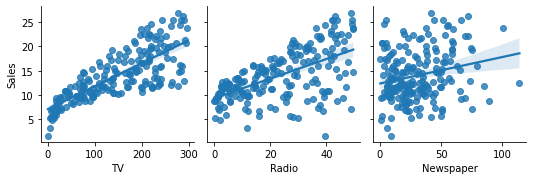

In [7]:
sns.pairplot(data=df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars=['Sales'], kind='reg')

<AxesSubplot:ylabel='Newspaper'>

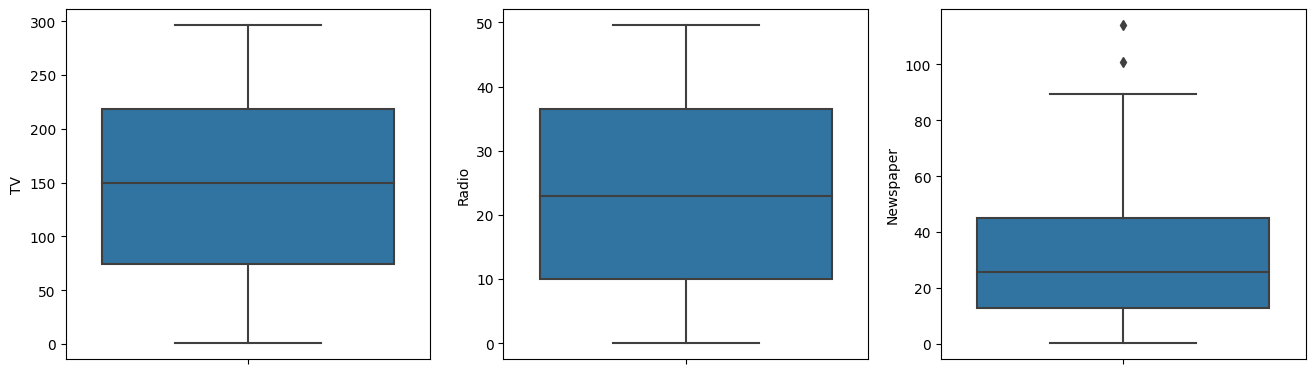

In [8]:
plt.figure(figsize=(16, 10))

plt.subplot(2, 3, 1)
sns.boxplot(data=df, y='TV')

plt.subplot(2, 3, 2)
sns.boxplot(data=df, y='Radio')

plt.subplot(2, 3, 3)
sns.boxplot(data=df, y='Newspaper')

In [9]:
df = df[df['Newspaper'] <= 95]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         198 non-null    float64
 1   Radio      198 non-null    float64
 2   Newspaper  198 non-null    float64
 3   Sales      198 non-null    float64
dtypes: float64(4)
memory usage: 7.7 KB


<AxesSubplot:>

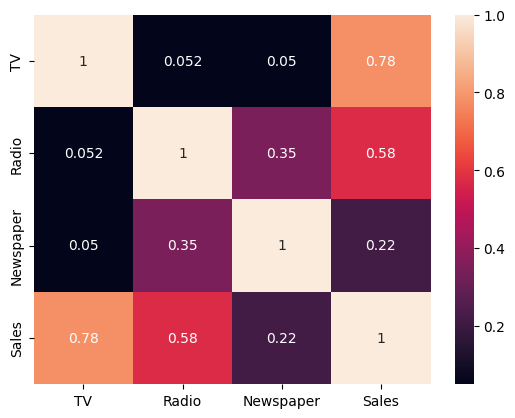

In [10]:
sns.heatmap(data=df.corr(), annot=True)

In [11]:
X = df.drop('Sales', axis='columns')
y = df['Sales']

In [12]:
data = {
    'linear_regression':{
        'model': LinearRegression(),
        'params':{}
    },
    'random_forest':{
        'model': RandomForestRegressor(),
        'params':{
            "n_estimators": range(10, 200, 10),
            "criterion":['squared_error', 'absolute_error', 'friedman_mse']
        }
    },
    'decision_tree':{
        'model': DecisionTreeRegressor(),
        'params':{
            'criterion':['squared_error', 'friedman_mse', 'absolute_error'], 
            'max_features':['sqrt', 'log2'],
        }
    }
}

In [ ]:
scores = []
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

for model_name, mp in data.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=cv, return_train_score=False)
    clf.fit(X, y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

result = pd.DataFrame(scores, columns=['model','best_score','best_params'])
result.head()

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
model = RandomForestRegressor(criterion='absolute_error')

model.fit(X_train, y_train)
model.score(X_test, y_test)

In [ ]:
with open('Sales_model', 'wb') as f:
    pickle.dump(model, f)